<a href="https://colab.research.google.com/github/asadbek11211/Pandas_exercises/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессионный анализ данных методами машинного обучения

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [ ]:
df1 = df[df.district == 'Сергелийский']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 147 to 7551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    175 non-null    object
 1   district    175 non-null    object
 2   rooms       175 non-null    int64 
 3   size        175 non-null    object
 4   level       175 non-null    int64 
 5   max_levels  175 non-null    int64 
 6   price       175 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.9+ KB


In [ ]:
df1['size'] = df1['size'].astype(float)

<ipython-input-77-9110909c2dc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size'] = df1['size'].astype(float)


In [ ]:
df1['price'] = df1['price'].astype(float)

ValueError: ignored

In [ ]:
'Договорная'
y = df1[df1['price'] != 'Договорная']

In [ ]:
y.sample(15)

,location,district,rooms,size,level,max_levels,price
4204,"город Ташкент, Сергелийский район, Сергели-VII",Сергелийский,3,85.0,1,9,59000
3277,"город Ташкент, Сергелийский район, Qoʻyliq -6 ...",Сергелийский,5,120.0,5,9,56000
3468,"город Ташкент, Сергелийский район, Сергели-II",Сергелийский,1,48.0,8,9,22907
3806,"город Ташкент, Сергелийский район, Сергели-V",Сергелийский,5,118.0,4,9,57993
6622,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,1,24.0,2,2,15500
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864
6709,"город Ташкент, Сергелийский район, Сергели-VIII",Сергелийский,4,99.5,8,9,50000
7523,"город Ташкент, Сергелийский район, Dostlik.2 1...",Сергелийский,4,100.0,2,9,38000
2630,"город Ташкент, Сергелийский район, 1-й проезд ...",Сергелийский,2,62.0,4,4,28000
1787,"город Ташкент, Сергелийский район, Бирлик",Сергелийский,6,130.0,5,9,75000


In [ ]:
print(y.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 147 to 7551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    160 non-null    object 
 1   district    160 non-null    object 
 2   rooms       160 non-null    int64  
 3   size        160 non-null    float64
 4   level       160 non-null    int64  
 5   max_levels  160 non-null    int64  
 6   price       160 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 147 to 7551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    175 non-null    object 
 1   district    175 non-null    object 
 2   rooms       175 non-null    int64  
 3   size        175 non-null    float64
 4   level       175 non-null    int64  
 5   max_levels  175 non-null    int64  
 6   price       175 

In [ ]:
y['price'] = y['price'].astype(float)

<ipython-input-82-b555b0993b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['price'] = y['price'].astype(float)


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 147 to 7551
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    160 non-null    object 
 1   district    160 non-null    object 
 2   rooms       160 non-null    int64  
 3   size        160 non-null    float64
 4   level       160 non-null    int64  
 5   max_levels  160 non-null    int64  
 6   price       160 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.0+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X = y[['size', 'rooms']]
y = y['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Коэффициенты линейной модели:", linear_model.coef_)


Коэффициенты линейной модели: [-9.11154102e+00  1.17549058e+04]


In [ ]:
linear_predictions = linear_model.predict(X_test)

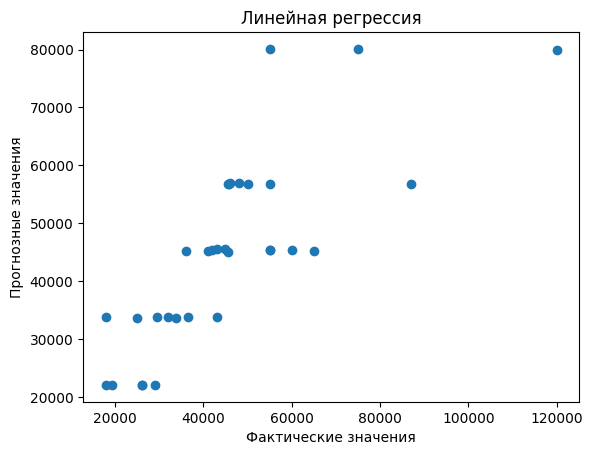

In [ ]:
plt.scatter(y_test, linear_predictions)
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозные значения")
plt.title("Линейная регрессия")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)


LinearRegression()

In [ ]:
print("Коэффициенты полиномиальной модели:", poly_model.coef_)


Коэффициенты полиномиальной модели: [ 0.00000000e+00  2.57987746e+02  1.14315577e+04 -2.78112233e-01
 -3.75796529e+01  1.96339978e+02]


In [ ]:
poly_predictions = poly_model.predict(poly.transform(X_test))

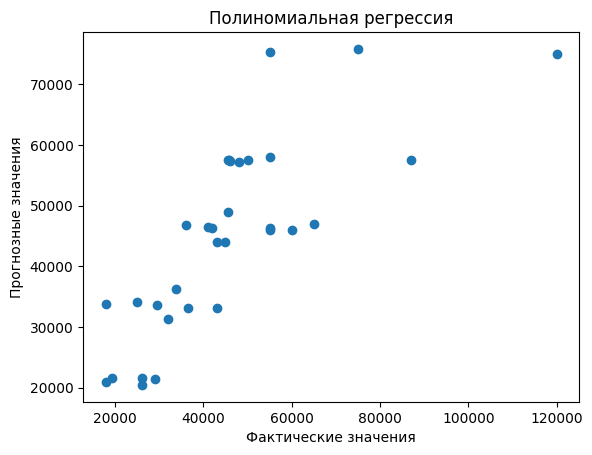

In [ ]:
# Строим график для полиномиальной регрессионной модели
plt.scatter(y_test, poly_predictions)
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозные значения")
plt.title("Полиномиальная регрессия")
plt.show()

In [ ]:
#Строим гребневую регрессионную модель
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [ ]:
print("Коэффициенты гребневой регрессионной модели:", ridge_model.coef_)


Коэффициенты гребневой регрессионной модели: [-4.09640477e+00  1.15732848e+04]


In [ ]:
# прогнозное значение для тестового набора данных
ridge_predictions = ridge_model.predict(X_test)


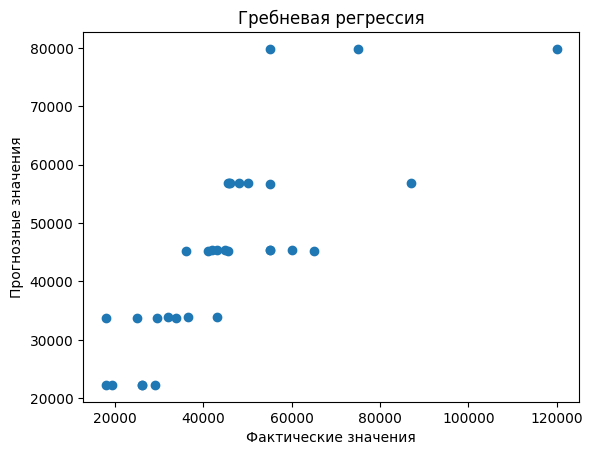

In [ ]:
# Строим график для гребневой регрессионной модели
plt.scatter(y_test, ridge_predictions)
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозные значения")
plt.title("Гребневая регрессия")
plt.show()